<h1><center><font color='blue'>CARGANDO LOS DATOS</font></center></h1>

<h2>Objetivo</h2><ul><li> Descargar y visualizar el dataset de imágenes</li></ul> 


## Introducción


La detección de grietas tiene vital importancia para el monitoreo e inspección en la seguridad estructural. En estos laboratorios aprenderemos a construir un clasificador eficiente usando modelos pre-entrenados que detectarán grietas en imágenes de concreto. Denotaremos las imágenes de concreto con grietas como la clase positiva y las que no tienen grietas como la negativa.

En este laboratorio veremos el proceso de cargar y visualizar el dataset de imágenes.


## Tabla de contenido

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1.  <a href="#item11">Descargar los datos</a>
2.  <a href="#item12">Importar librerías y paquetes necesarios</a>  
3.  <a href="#item13">Cargar imágenes</a>
    </font>
        

</div>


<a id='item11'></a>


## Descargar datos


In [1]:
# get the data
#!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip
    
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip'
filename = 'concrete_crack_images_for_classification.zip'
urllib.request.urlretrieve(url, filename)
    
    

('concrete_crack_images_for_classification.zip',
 <http.client.HTTPMessage at 0x264dd620df0>)

Ahora verá la carpeta _concrete_crack_images_for_classification.zip_ en el directorio desde donde realizó la descarga. El paso siguiente es decomprimirlo.


In [3]:
#!unzip concrete_crack_images_for_classification.zip

#import zipfile
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)

import zipfile
with zipfile.ZipFile('concrete_crack_images_for_classification.zip', 'r') as zip_ref:
    zip_ref.extractall()



Ahora verá 2 carpetas: _Positive_ y _Negative_. _Negative_ es la clase negativa que representa las imágenes sin grietas, y _Positive_ es la clase positiva que representa las imágenes con grietas.


<a id='item12'></a>


## Importando las librerías y paquetes necesarios


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

<a id='item13'></a>


## Cargar imágenes


Usaremos el enfoque estándar de cargar todas las imágenes en memoria y veremos cómo es ineficiente cuando se trata de construir modelos de deep learning  para clasificar imágenes.


Comenzaremos leyendo las imágenes negativas. Primero usaremos **os.scandir** para construir un iterador que itere a través del directorio _./Negative_.


In [4]:
negative_files = os.scandir('./Negative')
negative_files

Tomamos el primer archivo en el directorio.


In [5]:
file_name = next(negative_files)
file_name

<DirEntry '00001.jpg'>

Ya que el directorio puede contener elementos que no son archivos, solamente leeremos el elemento si es un archivo.


In [6]:
os.path.isfile(file_name)

True

Obtenemos el nombre de la imagen.


In [7]:
image_name = str(file_name).split("'")[1]
image_name

'00001.jpg'

Leemos en los datos de la imagen.


In [8]:
image_data = plt.imread('./Negative/{}'.format(image_name))
type(image_data)
image_data.shape


(227, 227, 3)

### **Pregunta**: Cuál es la dimensión de una imagen acorde a **image_data**?


227x227x3,

pixeles de 227x227 en color


Veamos la imagen.


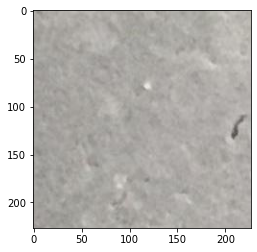

In [23]:
plt.imshow(image_data)

Ahora que estamos familizarizados con el proceso de leer en una imagen de datos recorramos todas las imágenes en el directorio _./Negative_, leámoslas y guardémoslas en la lista **negative_images**. Mediremos también el tiempo que demora.


In [ ]:
%%time

negative_images = []
for file_name in negative_files:
    if os.path.isfile(file_name):
        image_name = str(file_name).split("'")[1]
        image_data = plt.imread('./Negative/{}'.format(image_name))
        negative_images.append(image_data)
    
negative_images = np.array(negative_images)

Oops! El kernel murió debdio a un error out-of-memory.

Cargar imágenes en memoria no es el enfoque apropiado cuando se trabaja con imágenes. Por tanto, repetiremos el proceso pero esta vez guardaremos los caminos (paths) a las imágenes en una variable en lugar de cargar y guardar imágenes en sí mismas.

Entonces, en lugar de **os.scandir** usaremos **os.listdir**.


In [9]:
negative_images = os.listdir('./Negative')
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Observe que las imágenes no están necesariamente ordenadas; usaremos el método <code>sort</code> para ordenarlas.


In [10]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Antes de mostrar una imagen, necesitamos abrirla, lo que puede hacerse usando el móduulo **Image** de la librería **PIL**. Para abrir la primer imagen ejecutamos lo siguiente:


In [11]:
image_data = Image.open('./Negative/{}'.format(negative_images[0]))

Para ver la primer imagen, simplemente se ejecuta:


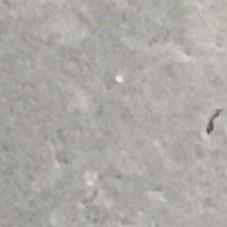

In [12]:
image_data

o se utiliza el método <code>imshow</code> como sigue:


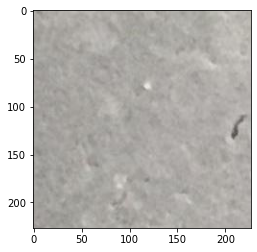

In [28]:
plt.imshow(image_data)

Recorramos todas las imágenes en el directorio <code>./Negative</code>  y guardemos sus paths.


In [13]:
negative_images_dir = ['./Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./Negative/00001.jpg',
 './Negative/00002.jpg',
 './Negative/00003.jpg',
 './Negative/00004.jpg',
 './Negative/00005.jpg',
 './Negative/00006.jpg',
 './Negative/00007.jpg',
 './Negative/00008.jpg',
 './Negative/00009.jpg',
 './Negative/00010.jpg',
 './Negative/00011.jpg',
 './Negative/00012.jpg',
 './Negative/00013.jpg',
 './Negative/00014.jpg',
 './Negative/00015.jpg',
 './Negative/00016.jpg',
 './Negative/00017.jpg',
 './Negative/00018.jpg',
 './Negative/00019.jpg',
 './Negative/00020.jpg',
 './Negative/00021.jpg',
 './Negative/00022.jpg',
 './Negative/00023.jpg',
 './Negative/00024.jpg',
 './Negative/00025.jpg',
 './Negative/00026.jpg',
 './Negative/00027.jpg',
 './Negative/00028.jpg',
 './Negative/00029.jpg',
 './Negative/00030.jpg',
 './Negative/00031.jpg',
 './Negative/00032.jpg',
 './Negative/00033.jpg',
 './Negative/00034.jpg',
 './Negative/00035.jpg',
 './Negative/00036.jpg',
 './Negative/00037.jpg',
 './Negative/00038.jpg',
 './Negative/00039.jpg',
 './Negative/00040.jpg',


Veamos cuántas imágenes sin grietas existen en el dataset.


In [30]:
len(negative_images_dir)

20000

### Pregunta: Muestre algunas imágenes


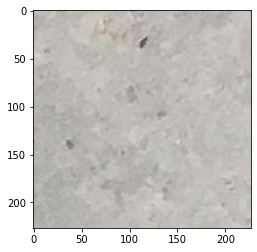

In [14]:
## You can use this cell to type your code to answer the above question
image_data1 = Image.open('./Negative/{}'.format(negative_images[1]))
image_data2 = Image.open('./Negative/{}'.format(negative_images[2]))
image_data2 = Image.open('./Negative/{}'.format(negative_images[3]))
plt.imshow(image_data2)




Guarde los paths de todas las imágenes en el directorio _./Positive_ en una lista llamada **positive_images_dir**. Ordene los paths.


In [32]:
## Type your answer here
positive_images = os.listdir('./Positive')
positive_images.sort()
positive_images_dir = ['./Positive/{}'.format(image) for image in positive_images]


### Pregunta: Cuántas imágenes de concreto con grietas existen en el directorio _./Positive_ ?


In [33]:
len(positive_images_dir)


20000

### Muestre algunas imágenes de concreto con grietas


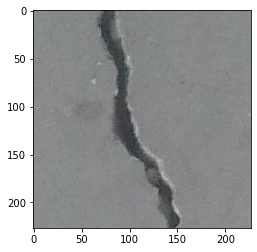

In [34]:
image_pos1 = Image.open('./Positive/{}'.format(positive_images[0]))
plt.imshow(image_pos1)


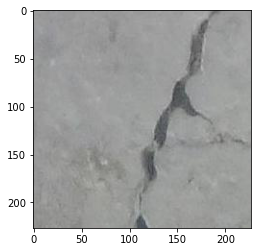

In [35]:
image_pos2 = Image.open('./Positive/{}'.format(positive_images[1]))
plt.imshow(image_pos2)